<a href="https://colab.research.google.com/github/hajyhia/Plant-Diseases-Classification/blob/main/copy_1_crops_detectetion_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link dataset https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Dataset download

In [1]:
!pip install kaggle

In [6]:
import os
os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'key'

# from google.colab import files
# files.upload()

In [7]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [8]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:08<00:00, 314MB/s]
100% 2.70G/2.70G [00:08<00:00, 326MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d new-plant-diseases-dataset/
!rm -rf '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)'

In [ ]:
# !rm -rf '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)'

# ***Import Libarys***

In [ ]:
!pip install tensorflow

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
warnings.filterwarnings('ignore')
print('compeleted')
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

compelet
Num GPUs Available: 1


# ***Data understanding & Visualizatio***

In [88]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
image_shape = (224, 224)
batch_size = 128
epochs = 30  # Adjust as needed
data_path = '/content/new-plant-diseases-dataset/'

# Paths (make sure data_path is defined)
train_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')
valid_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid')

# Image generators
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load training data
print("Training Images:")
train_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# Load validation data
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

# Load test data (separate validation folder)
print("Test Images:")
test_data = test_datagen.flow_from_directory(valid_folder,
                                             target_size=image_shape,
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)



Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


***From previous cell we know that we have 38 class***
> * 56251 images in train data
> * 14044 images in valisation data
> * 17572 images in test data
> * 33 imgeas in test data (the label of test data is the name of image) we will uses them to predict later

***But what are 38 classes ?!***

In [48]:
# show how data store
images, labels = next(iter(train_data))
print(f'shape of image is : {images[0].shape}')
print(f'shape of label is : {labels[0].shape}')

shape of image is : (224, 224, 3)
shape of label is : (38,)


In [50]:
# Show all diseases (class names) in the dataset
diseases = os.listdir(train_folder)
print(f"Diseases in dataset {len(diseases)}:")
print(train_data.class_indices)
print(diseases)

Diseases in dataset 38:
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___L

***We notice that we have the same plant in different class such as:***
 > * Tomato___Early_blight
 > * Tomato___Late_blight
 > * Tomato___healthy
 > * ...

***so we need to know what is the different type of plant we have***

In [ ]:
os.makedirs('/content/working', exist_ok=True)

In [51]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Apple', 'Grape', 'Blueberry', 'Tomato', 'Orange', 'Cherry_(including_sour)', 'Squash', 'Raspberry', 'Pepper,_bell', 'Potato', 'Corn_(maize)', 'Peach', 'Soybean', 'Strawberry']


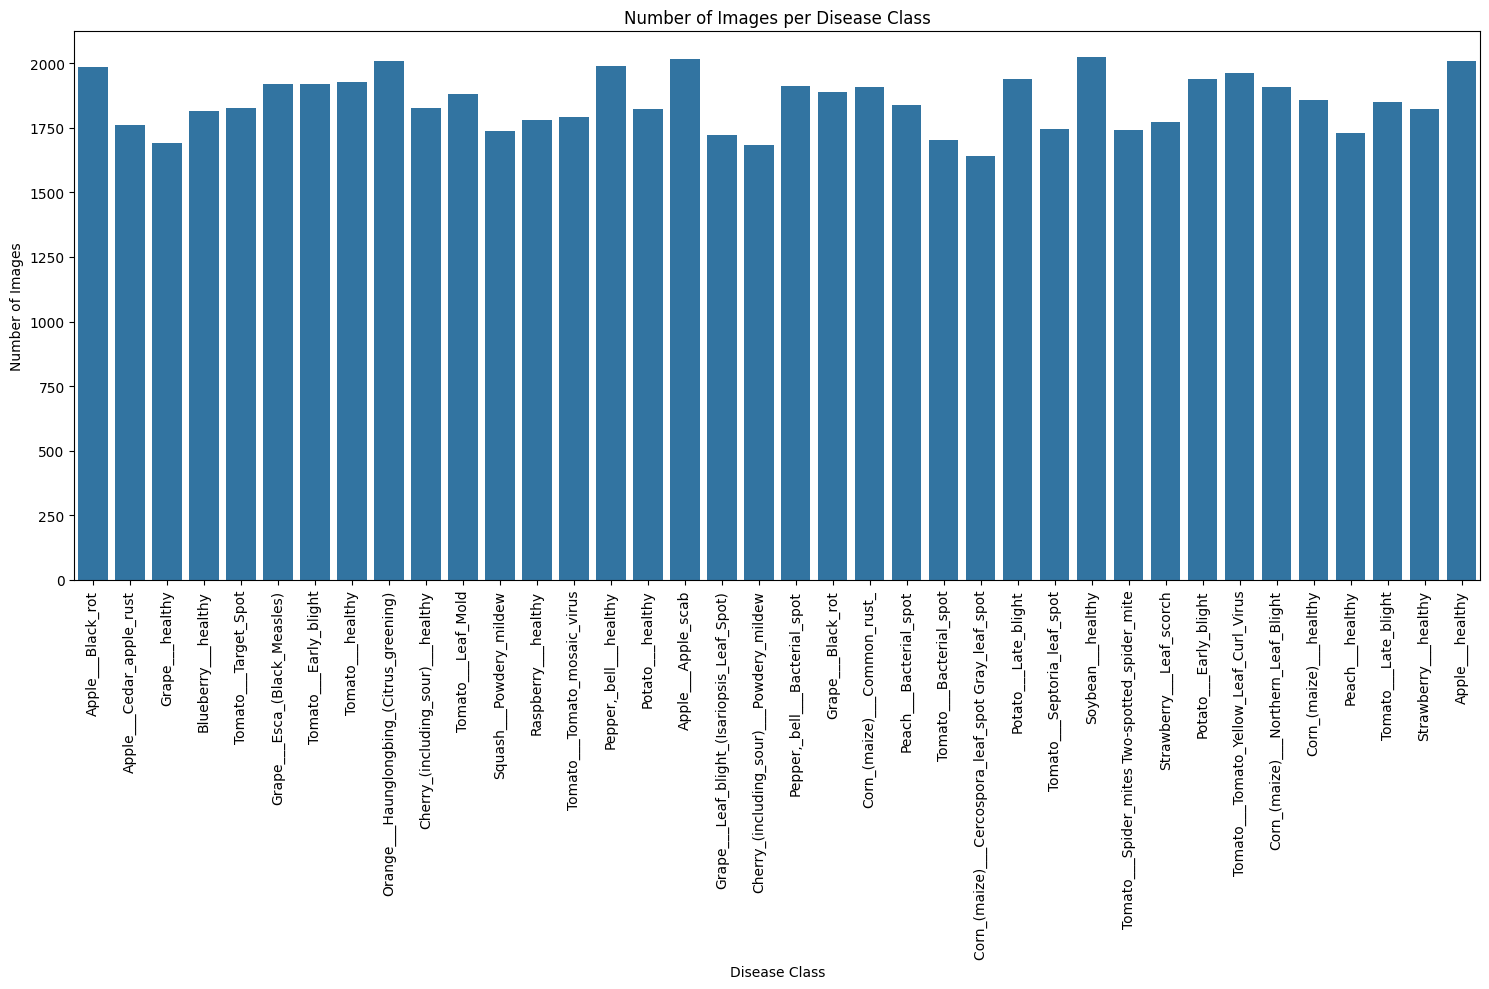

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionary of class counts
dic = {}
for disease_class in diseases:
    class_path = os.path.join(train_folder, disease_class)
    dic[disease_class] = len(os.listdir(class_path))

# Convert to DataFrame
df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# Optional: sort by number of images
# df = df.sort_values(by="Number of Images", ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Disease Class', y='Number of Images')
plt.xticks(rotation=90)
plt.title("Number of Images per Disease Class")
plt.tight_layout()
plt.show()


***As we notice that classes are somewhat balanced***

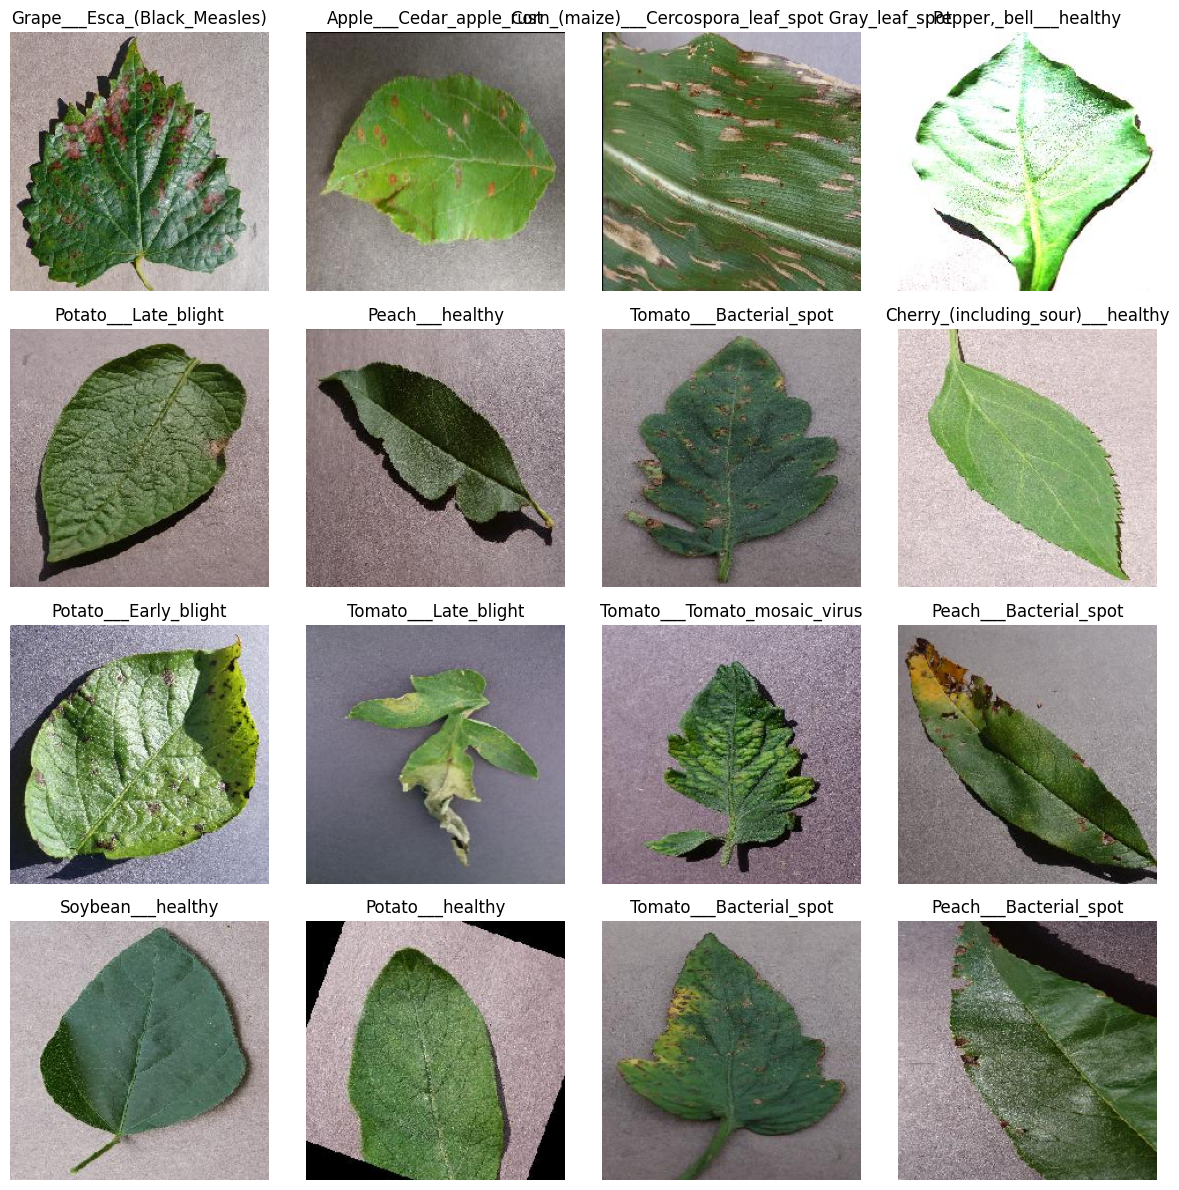

In [53]:
import random
import numpy as np

# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


# ***Modeling***

***Function will be used***

Learning curve function
> * learning curve
> * loss curve

In [54]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    # accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Prediction function
> Compare Truth label (name of image ) with predicted label

In [55]:
def predict_labels_and_display(model_path, test_dir='/content/new-plant-diseases-dataset/test/test', image_size=(224, 224)):
    # load the best model
    best_model = load_model(model_path)

    true_labels = []
    predicted_labels = []
    images = []

    for filename in os.listdir(test_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # load test images
            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # predict
            prediction = best_model.predict(img_array, verbose=0)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # extract the label (name of image)
            true_label = filename.split('.')[0]

            # get the prediction class
            class_labels = list(train_data.class_indices.keys())
            predicted_label = class_labels[predicted_class]

            true_labels.append(true_label)
            predicted_labels.append(predicted_label)
            images.append(img)

    # randomly select three images
    selected_indices = random.sample(range(len(images)), 3)

    # show selected images
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [57]:
diseases_class = list(train_data.class_indices.keys())

with open("/content/working/diseases_labels", "w") as f:
    for itm in diseases_class:
        f.write(itm + "\n")

In [24]:
models = {
"Xception": tf.keras.applications.Xception,

"VGG16": tf.keras.applications.VGG16,

"VGG19": tf.keras.applications.VGG19,

"ResNet50": tf.keras.applications.ResNet50,

"ResNet101": tf.keras.applications.ResNet101,

"ResNet152": tf.keras.applications.ResNet152,

"InceptionV3": tf.keras.applications.InceptionV3,

"MobileNet": tf.keras.applications.MobileNet,

"MobileNetV2": tf.keras.applications.MobileNetV2,
"DenseNet121": tf.keras.applications.DenseNet121,
    "DenseNet169": tf.keras.applications.DenseNet169,

"DenseNet201": tf.keras.applications.DenseNet201,

"NASNetMobile": tf.keras.applications.NASNetMobile,

"NASNetLarge": tf.keras.applications.NASNetLarge,

"EfficientNetB0": tf.keras.applications.EfficientNetB0,

"EfficientNetB1": tf.keras.applications.EfficientNetB1,

"EfficientNetB2": tf.keras.applications.EfficientNetB2,

"EfficientNetB3": tf.keras.applications.EfficientNetB3,

"EfficientNetB4": tf.keras.applications.EfficientNetB4,

"EfficientNetB5": tf.keras.applications.EfficientNetB5,
"EfficientNetB6": tf.keras.applications.EfficientNetB6,
"EfficientNetB7": tf.keras.applications.EfficientNetB7
}

In [25]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs )
model_name='MobileNetV2'
# Load the base model
base_model = models[model_name](include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
base_model.outputs

[<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_153>]

In [ ]:
base_model.summary()

# ***CNN Model***

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
# Model Architecture
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 49, 49, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 744,966 (2.84 MB)

 Trainable params: 743,046 (2.83 MB)

 Non-trainable params: 1,920 (7.50 KB)

# Run Model

In [89]:
# train the model
model_checkpoint = ModelCheckpoint('/content/working/cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.9310 - loss: 0.2231
Epoch 1: val_accuracy improved from -inf to 0.87632, saving model to /content/working/cnn_model.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 140s 306ms/step - accuracy: 0.9310 - loss: 0.2230 - val_accuracy: 0.8763 - val_loss: 0.3780
Epoch 2/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9390 - loss: 0.1949
Epoch 2: val_accuracy improved from 0.87632 to 0.95422, saving model to /content/working/cnn_model.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 115s 262ms/step - accuracy: 0.9390 - loss: 0.1949 - val_accuracy: 0.9542 - val_loss: 0.1361
Epoch 3/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9405 - loss: 0.1861
Epoch 3: val_accuracy did not improve from 0.95422
440/440 ━━━━━━━━━━━━━━━━━━━━ 114s 259ms/step - accuracy: 0.9405 - loss: 0.1861 - val_accuracy: 0.9150 - val_loss: 0.2592
Epoch 4/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.9451 - loss: 0.1778
Epoch 4: val_accuracy did n

In [94]:
#  save model to use later
saved_model = '/content/working/ai_crops_model_1406_01_30_epochs_batch_64_94.67.keras'
model.save(saved_model)

In [ ]:
# model.save('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model_.keras')

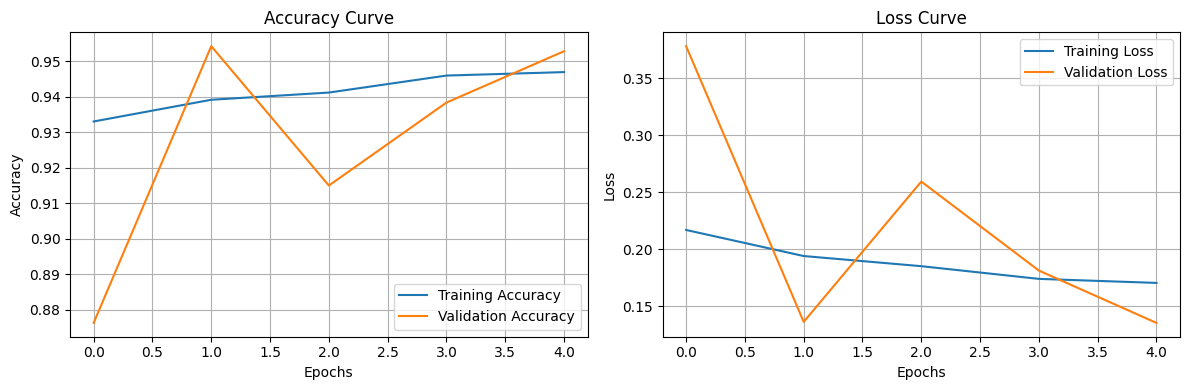

In [92]:
plot_learning_curves(history)

In [93]:
best_model = load_model(saved_model)

# best_model = load_model('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model.keras')
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

138/138 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.9591 - loss: 0.1183
Test Loss: 0.1394
Test Accuracy: 0.9531


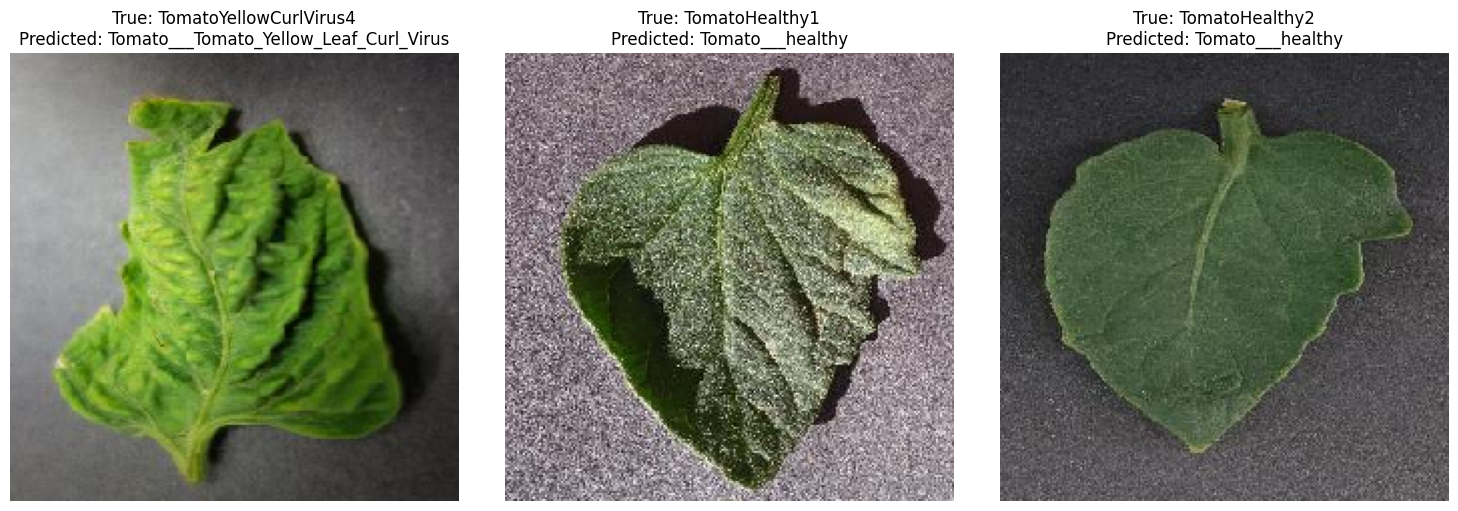

In [95]:
# show random sample of prediction of model on test data
predict_labels_and_display(saved_model)
# predict_labels_and_display('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model.keras')